#  Group Lab 8 

## Inference for Difference Parameters

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

<hr>

## <u>Case Study 1</u>: Buying Girl Scout Cookies

The underlying assumption of the hypothesis testing framework is that the null hypothesis is true.  This premise serves as the primary support for hypothesis testing being successful.  We'll explore this idea for this Case Study.

Suppose that the proportion of all undergraduate students who will buy Girl Scout Cookies this year is 0.375 (3/8).  Suppose that the proportion of all graduate students who will buy Girl Scout Cookies this year is also 0.375 (3/8).  Typically, we wouldn't know this value and would instead rely on our sample to perform inference.  For the sake of this exercise, we will be omniscient (all-knowing).  

We will generate sample data from this information.  Based on sample data, we'd like to assess if the population proportions for all undergraduate students and all graduate students who will buy Girl Scout Cookies this year is equal.

In other words, we'll explore the hypotheses:

$H_0: p_1 = p_2$ vs. $H_a: p_1 \neq p_2$

### 1.Specify a Distribution

Imagine that we take a random sample of 80 undergraduate students and a second random sample of 45 graduate students.  For each of these samples, we first count the number of students who bought Girl Scout Cookies this year (and are considered a successful trial), $X_1$ (the number of undergraduate students from a random sample who bought Girl Scout Cookies) and $X_2$ (the number of graduate students  from a random sample who bought girl scout cookies).  The random variables $X_1$ and $X_2$ follow specific theoretical distributions.  **Completely** specify these distributions.

Considering a random sampling a successful trial, X1 and X2 both follow binomial distribution. 
X1 ~ Binom(80, 0.375), X2 ~ Binom(45, 0.375)

### 2. Single Sample

Using the distribution from part 2, generate a random sample of 80 undergraduate students and a second random sample of 45 graduate students.  Specify a random state of 80 and 45 for these two samples, respectively.

**a)** Using this sample information, calculate the sample proportions of students who order Girl Scout Cookies for each of the two groups.

In [3]:
from scipy.stats import binom

In [23]:
grad = binom.rvs(80, 0.375, random_state = 80)
p1 = grad / 80
p1

0.375

In [24]:
undergrad = binom.rvs(45, 0.375, random_state = 45)
p2 = undergrad / 45
p2

0.5333333333333333

**b)** Using this sample information, calculate the estimated common sample proportion under the null hypothesis.

In [25]:
p = (grad + undergrad) / (80+45)
p

0.432

**c)** Calculate the test statistic for your simulated samples.

In [26]:
standard_error = np.sqrt((p*(1-p)/80)+(p*(1-p)/45))
test_stat = (p1-p2) / standard_error
test_stat

-1.7153492521523646

**d)** Calculate the *p*-value for your sample data.

In [27]:
from scipy.stats import norm
pvalue=2*(1-norm.cdf(np.abs(test_stat)))
pvalue

0.08628121363245422

### 3. Sampling Distribution

**a)** Now, instead of just a single sample, we want to understand the value of all possible test statistics.  Repeat the calculation from Question 2 1000 times, recording the value of the test statistic and the *p*-value for each set of random samples.  

**Note: For this question, you do not need to record the sample proportions or the common sample proportion in your output.**

In [31]:
tstat = []
pval = []

for i in range(1000):
    grad = binom.rvs(80, 0.375)
    p1 = grad / 80
    undergrad = binom.rvs(45, 0.375)
    p2 = undergrad / 45
    p = (undergrad + grad) / (80+45)
    standard_error = np.sqrt((p*(1-p)/80)+(p*(1-p)/45))
    test_stat = (p1-p2) / standard_error 
    pvalue=2*(1-norm.cdf(np.abs(test_stat)))
    
    tstat.append(test_stat)
    pval.append(pvalue)

df = pd.DataFrame({"test_statistic": tstat, "p-value" : pval})
df

,test_statistic,p-value
0,-2.232191,0.025602
1,-0.621809,0.534068
2,-1.521452,0.128147
3,0.136495,0.891430
4,1.653101,0.098310
...,...,...
995,-0.741665,0.458290
996,-0.621809,0.534068
997,-1.682860,0.092402
998,0.515646,0.606102


**b)** Using the data generated in Question 3a, generate a histogram for the simulated test statistics.

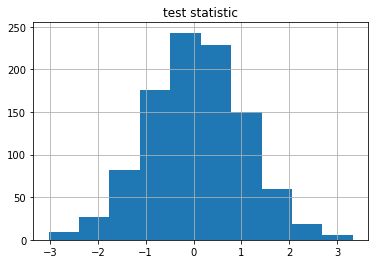

In [32]:
df['test_statistic'].hist()
plt.title('test statistic')
plt.show()

**c)** Using the data generated in Question 3a, generate a histogram for the simulated *p*-values.

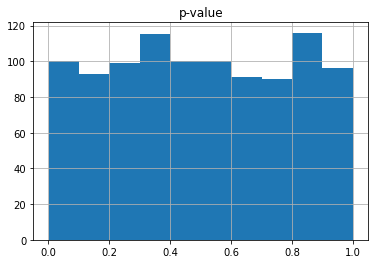

In [33]:
df['p-value'].hist()
plt.title('p-value')
plt.show()

**d)** Describe the shape of the distribution for the simulated test statistics and of the distribution for the simulated *p*-values.

The shape of the distribution for the simulated test statistics is normal, it is nearly symmetric with its center on 0. The shape of the distribution for p-value is rather uniform. 

### 4. Significance Level

Our significance level is the proportion of times that we would reject the null hypothesis if the null hypothesis is really true.  In other words, it's the probability of making a specific kind of mistake when performing a hypothesis test.

We have assumed the null hypothesis is true when generating our random samples, so we have met that condition from our definition of the significance level.

We'll consider two different significance levels: $\alpha = 0.2$ and $\alpha = 0.05$.

Using the simulated p-values from Question 3, what proportion of the time would we decide to reject the null hypothesis at a significance level of 0.2?  What about for a significance level of 0.05?

In [35]:
sum(df['p-value']<0.2) / 1000

0.193

In [36]:
sum(df['p-value']<0.05) / 1000

0.056

193 times out of 1,000 times, we reject the null hypothesis at a significance level of 0.2.
56 times out of 1,000 times, we reject the null hypothesis at a significance level of 0.05. 

<hr>

## <u>Case Study 2</u>: Revisiting Groundhog Day

Recall that we previously explored the results of Groundhog Day, where tradition claims that weather in February and March is influenced by whether a groundhog named Phil sees his shadow in Pennsylvania.  In Homework 4, we explored how the temperatures in the Midwest varied based on whether Phil saw his shadow descriptively.  Now, we'll consider what we can say about the behavior of possible average temperatures using the principles of statistical inference.

Specifically, we'll use the variables Phil, which records the results of Phil's experiment, and February Average Temperature to assess if there is evidence that supports that Phil's results are accurate as measured by February Average Temperatures.

### 5. Simulated Sampling Distributions

Rather than rely on traditional hypothesis testing approaches (where the distributional assumptions may not be met), we'll rely on simulations through a resampling approach in order to generate a sampling distribution for our test statistic if the null hypothesis of no difference between the population parameters is correct, or if the tradition is correct (that the mean of the average February temperature when Phil sees his shadow (full shadow) is less than the mean of the average February temperature when Phil doesn't see his shadow (no shadow)). 

**a)** First, read in the cleaned version of the groundhog data.

In [37]:
ground = pd.read_csv('groundhog_cleaned.csv')
ground

,Year,Phil,February Average Temperature,February Average Temperature (Northeast),February Average Temperature (Midwest),February Average Temperature (Pennsylvania),March Average Temperature,March Average Temperature (Northeast),March Average Temperature (Midwest),March Average Temperature (Pennsylvania)
0,1898,Full Shadow,35.37,24.8,33.3,26.7,41.05,38.0,46.0,42.0
1,1900,Full Shadow,30.76,21.4,27.5,24.1,41.27,26.0,37.9,29.3
2,1901,Full Shadow,29.86,16.0,26.2,18.9,40.71,30.8,41.9,35.1
3,1903,Full Shadow,28.42,24.5,31.3,28.0,42.21,40.4,47.7,44.5
4,1904,Full Shadow,31.59,15.0,28.2,19.2,41.76,29.8,42.8,34.0
...,...,...,...,...,...,...,...,...,...,...
110,2012,Full Shadow,37.51,30.6,38.6,34.3,50.41,43.4,56.3,47.7
111,2013,No Shadow,34.77,25.3,33.4,27.4,40.91,32.7,37.3,33.9
112,2014,Full Shadow,32.13,21.0,27.1,22.8,40.51,26.0,38.0,30.3
113,2015,Full Shadow,32.99,12.1,23.4,16.1,45.39,27.8,41.6,31.6


**b)** We'll use simulation to perform a resampling approach to hypothesis testing.  In essence, we will reshuffle whether Phil saw his shadow or not for each year.

To do this, 
- Sample the results of Phil's experiment without replacement.  Use a sample size equal to the full sample size.  Be sure to ignore the original indices.  
- Create a new data frame that combines your reshuffled results of Phil with the original temperatures (in their original order).
- Calculate the difference in the means of the average February temperatures (full shadow minus no shadow).  Record this value.
- Repeat this process 300 times.

In [49]:
diff = []

for i in range(300):
    Phil = ground['Phil'].sample(115, replace = False, ignore_index = True)
    avg_temp = ground['February Average Temperature']
    df = pd.DataFrame({"Phil":Phil, "average temperature":avg_temp})
    x1 = df[df['Phil'] == 'Full Shadow']['average temperature'].mean()
    x2 = df[df['Phil'] == 'No Shadow']['average temperature'].mean()
    difference = x1 - x2
    diff.append(difference)

diff

[0.48969999999999914,
 -0.6119999999999948,
 0.7457666666666682,
 -1.4499666666666684,
 -0.24629999999999797,
 -0.5230666666666721,
 -0.9861333333333349,
 -0.21103333333334007,
 1.0585666666666569,
 -0.988433333333333,
 -0.5698333333333281,
 -0.46940000000000737,
 -0.5981999999999985,
 0.36549999999999727,
 0.41763333333333463,
 1.017933333333339,
 0.6913333333333398,
 -0.046200000000006014,
 0.5870666666666722,
 -0.9723333333333315,
 -0.4494666666666589,
 -1.4883000000000024,
 -0.16963333333332997,
 -0.32756666666666234,
 -0.20106666666665518,
 0.36780000000000257,
 0.8423666666666563,
 0.1324333333333314,
 0.7833333333333314,
 0.30416666666666714,
 -0.6741000000000099,
 -1.5412000000000106,
 1.5162666666666667,
 -1.1793333333333393,
 -0.33140000000000924,
 -1.2996999999999943,
 0.021266666666662104,
 0.7434666666666558,
 -1.2636666666666656,
 0.5464333333333329,
 1.1536333333333388,
 -1.285899999999998,
 1.5998333333333221,
 -1.1341000000000037,
 -0.22253333333333813,
 -1.04286666666

In [65]:
diff = pd.DataFrame({'diff':diff})

### 6. Evaluating Your Sample

**a)** Calculate your observed sample statistic.  This would be the observed difference in the means of the average February temperatures (full shadow minus no shadow).

In [62]:
full_mean = ground[ground['Phil'] == 'Full Shadow']['February Average Temperature'].mean() 
no_mean = ground[ground['Phil'] == 'No Shadow']['February Average Temperature'].mean()
observed_diff = full_mean - no_mean
observed_diff

-1.8654999999999973

**b)** Using your simulated sampling distribution from Question 5b, determine how often you would get an observed statistic as extreme or more extreme than what we observed. 

In [72]:
extreme = (diff<-1.8655).sum() 
extreme 

diff    4
dtype: int64

There are 4 observed statistic as extreme than what we observed. 

**c)** What does this tell you about the original tradition of Groundhog Day?

There are few observations, so I can tell the the original traditional of Groundhog Day is not convincing. 